<a href="https://colab.research.google.com/github/AAFREEN-SAYYED/ML-Practical-Solution/blob/gh-pages/ML_6_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression with Python**
In this sample, we have to use 4 libraries as numpy, pandas, matplotlib and sklearn. Now we have to import libraries and get the data set first:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


**Code explanation:**

dataset: the table contains all values in our csv file

X: the 2nd column which contains Years Experience array

y: the last column which contains Salary array

Let’s split our dataset to get training set and testing set (both X and y values per each set)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**Code explanation:**

***test_size=0.2:*** we will split our dataset (10 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 0.2 (2 observations will be put into the test set. You can put it 1/5 to get 20% or 0.2, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.

**train_size**: if we use the test_size already, the rest of data will automatically be assigned to train_size.

**random_state**:this is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

We already have the train set and test set, now we have to build the Regression Model. Firstly, we will build a Linear Regression model and visualize it (it’s no need to include this step in your practice, we just do this for comparison between Linear and Polynomial only):

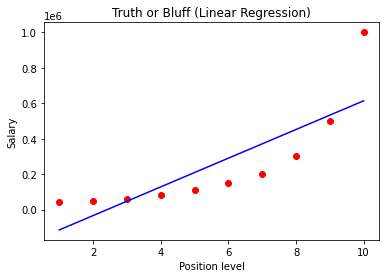

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()


*In another hand, we will build the Polynomial Regression model and visualize it to see the differences:*

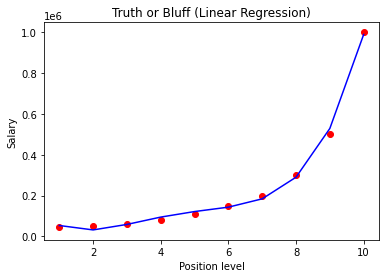

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()


Last step, let’s predict the value of our candidate (with 5.5 YE) using both Linear Regression model and Polynomial Regression model:


In [ ]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])


array([249500.])

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))


array([132148.43750002])

You can see, the predicted values using Linear Regression model and Polynomial Regression model are totally different!

Let’s scroll up and check again what we got? According to our data set, our salary should be:

$110,000 < the salary < $150,000

But the predicted salary using Linear Regression lin_reg is $249,500.
 It’s unacceptable (but still in the range of -10,000 to 300,000 according to Linear Regression)! 
 What’s about using Polynomial Regression? Our pol_reg value is $132,148.43750 which is very close to our Mean value which is $130,000.

